In [14]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [15]:
#Load Dataset
file_path = "/Users/macbookair/Desktop/depression_data.csv"
df = pd.read_csv(file_path)

In [16]:
#Data Exploration
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Shape of dataset: (413768, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12

In [17]:
#Statistical Summary
print("\nSummary of numerical features:")
print(df.describe())


Summary of numerical features:
                 Age  Number of Children         Income
count  413768.000000       413768.000000  413768.000000
mean       49.000713            1.298972   50661.707971
std        18.158759            1.237054   40624.100565
min        18.000000            0.000000       0.410000
25%        33.000000            0.000000   21001.030000
50%        49.000000            1.000000   37520.135000
75%        65.000000            2.000000   76616.300000
max        80.000000            4.000000  209995.220000


In [19]:
#Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [20]:
#Drop irrelevant columns
df = df.drop(columns=["Name"])
print("\nDropped 'Name' column")


Dropped 'Name' column


In [21]:
#Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns
print("\nCategorical Columns:", categorical_cols.tolist())


Categorical Columns: ['Marital Status', 'Education Level', 'Smoking Status', 'Physical Activity Level', 'Employment Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']


In [22]:
#Show unique values for each categorical feature
for col in categorical_cols:
    print(f"\n{col} -> {df[col].unique()}")


Marital Status -> ['Married' 'Widowed' 'Divorced' 'Single']

Education Level -> ["Bachelor's Degree" 'High School' "Master's Degree" 'Associate Degree'
 'PhD']

Smoking Status -> ['Non-smoker' 'Former' 'Current']

Physical Activity Level -> ['Active' 'Sedentary' 'Moderate']

Employment Status -> ['Unemployed' 'Employed']

Alcohol Consumption -> ['Moderate' 'High' 'Low']

Dietary Habits -> ['Moderate' 'Unhealthy' 'Healthy']

Sleep Patterns -> ['Fair' 'Good' 'Poor']

History of Mental Illness -> ['Yes' 'No']

History of Substance Abuse -> ['No' 'Yes']

Family History of Depression -> ['Yes' 'No']

Chronic Medical Conditions -> ['Yes' 'No']


In [23]:
#Encode categorical variables
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [24]:
#Print encoded variables
print("\nAfter encoding categorical features:")
print(df.head())


After encoding categorical features:
   Age  Marital Status  Education Level  Number of Children  Smoking Status  \
0   31               1                1                   2               2   
1   55               1                2                   1               2   
2   78               3                3                   1               2   
3   58               0                3                   3               2   
4   18               2                2                   0               2   

   Physical Activity Level  Employment Status     Income  Alcohol Consumption  \
0                        0                  1   26265.67                    2   
1                        2                  0   42710.36                    0   
2                        2                  0  125332.79                    1   
3                        1                  1    9992.78                    2   
4                        2                  1    8595.08                    1   



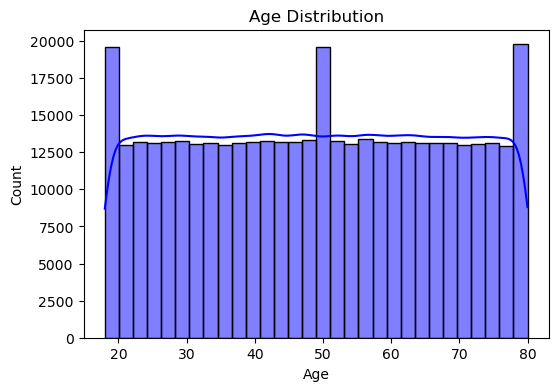

In [25]:
#Data Visualization
# Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.show()

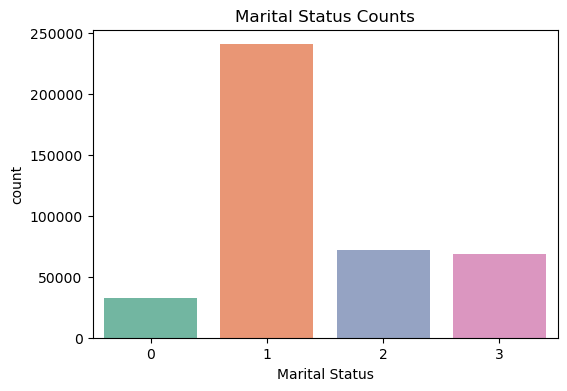

In [27]:
# Marital Status Counts (fixed)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Marital Status", hue="Marital Status", palette="Set2", legend=False)
plt.title("Marital Status Counts")
plt.show()

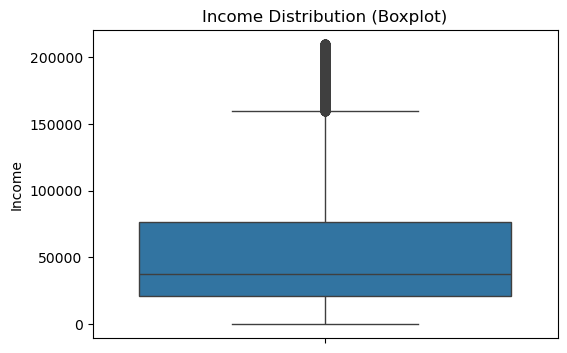

In [28]:
# Income Distribution (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, y="Income")
plt.title("Income Distribution (Boxplot)")
plt.show()

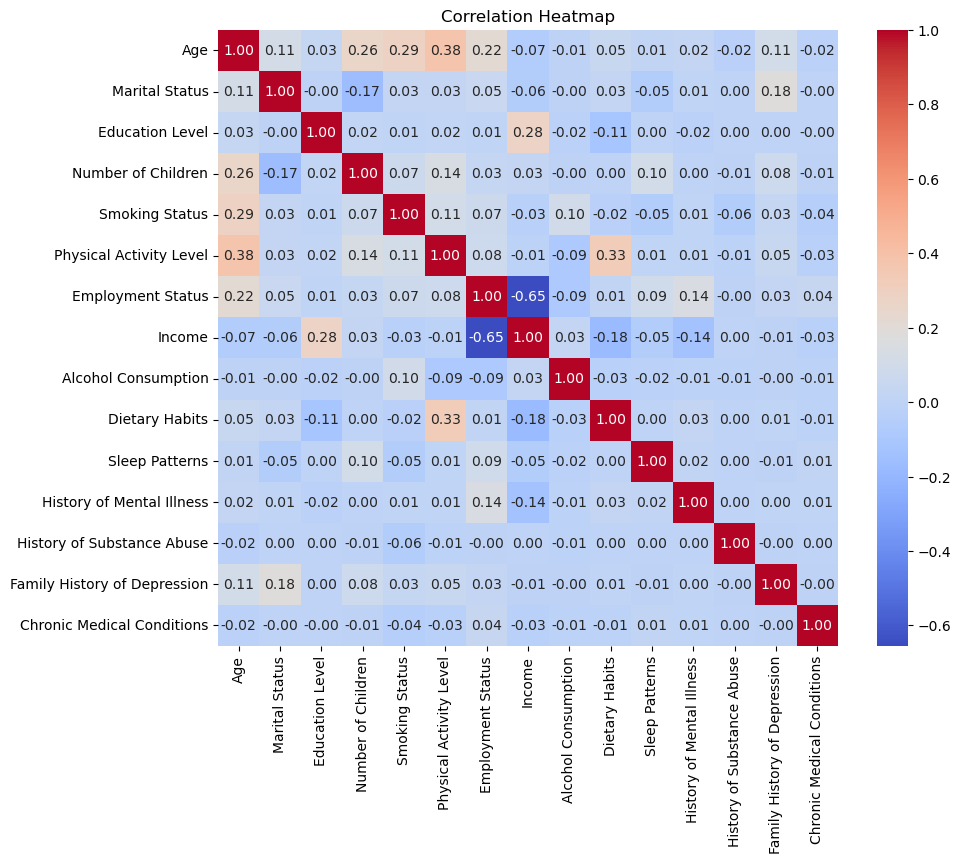

In [29]:
# Correlation Heatmap (numerical features)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
#Feature Selection
# Target: History of Mental Illness
X = df.drop(columns=["History of Mental Illness"])
y = df["History of Mental Illness"]

In [32]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
#Model Training (Decision Tree)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:
#Model Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
cm = confusion_matrix(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


📊 Model Evaluation Results:
Accuracy:  0.5807
Precision: 0.5883
Recall:    0.5807
F1 Score:  0.5843

Confusion Matrix:
[[39408 18181]
 [16520  8645]]
